In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
import sklearn.linear_model
import sklearn.metrics

import keras

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [14]:
from sklearn.model_selection import train_test_split

### Machine Learning Frameworks in Python

1. **Scikit-Learn**
   - Widely used for traditional machine learning algorithms.
   - Known for its simplicity and ease of use, particularly well-suited for beginners.

2. **TensorFlow**
   - Highly popular in deep learning and neural networks.
   - Offers robust support for large-scale and complex models.

3. **Keras**
   - High-level neural networks API, now fully integrated with TensorFlow.
   - Focuses on enabling fast experimentation and prototyping.

4. **PyTorch**
   - Developed by Facebook's AI Research lab.
   - Known for its flexibility, ease of use, and dynamic computation graph, making it popular in research.

### Summary of TensorFlow

- **Comprehensive, Open-Source ML Library**: TensorFlow is an open-source software library for machine learning developed by the Google Brain team. It offers a comprehensive ecosystem of tools, libraries, and community resources that enable researchers and developers to build and deploy ML-powered applications.
- **Graph-Based Execution**: TensorFlow operates on a graph-based computation system where mathematical operations are represented as nodes, and data (tensors) flow along edges. This allows for efficient execution and optimization, particularly beneficial for deep learning models.

### Overview of Keras

#### Introduction to Keras
- **High-Level Neural Networks API**: Keras is an open-source neural network library written in Python. It is designed to enable fast experimentation with deep neural networks.
- **User-Friendly Interface**: Offers a simpler, more intuitive syntax which is ideal for beginners in deep learning and neural network programming.

#### Keras in the TensorFlow Ecosystem
- **Integration with TensorFlow**: Originally an independent project, Keras is now fully integrated into TensorFlow as `tf.keras`, making it an official high-level API of TensorFlow.
- **Flexibility and Compatibility**: Works seamlessly with core TensorFlow functionality, allowing users to build and train models using Keras with TensorFlow running in the background.
- **Support for TensorFlow Features**: Enables access to TensorFlow's advanced features, like distributed training, performance optimizations, and production deployment.

#### Key Features and Advantages of Using Keras
- **Ease of Use**: Known for its user-friendly and modular approach, making the building and testing of neural networks as straightforward as possible.
- **Modularity and Flexibility**: Models in Keras are defined as sequences or graphs of standalone, fully-configurable modules. This modular design is extensible and adaptable to new developments and ideas in the field of deep learning.
- **Pre-built Layers and Models**: Offers a wide range of pre-built layers and models, reducing the need for users to start from scratch when building common types of neural networks.
- **Rapid Prototyping**: Enables fast and easy prototyping of deep learning models, with a focus on reducing the cognitive load for users.


## Load data

In [15]:
# Download from URL
# url = "https://zenodo.org/record/7298798/files/daydatamat.csv"
# df = pd.read_csv(url,index_col=0)
# df

In [108]:
# Use local file 
path = '../data/daydatamat.csv'
path = 'daydatamat.csv'
df = pd.read_csv(path,index_col=0)
df

,Age,Day number,Bee unique ID,Cohort ID,Honey,Brood care,Pollen,Dance floor,Other,Frame 0,...,Frame 2 - Num. crossings,Frame 3 - Num. crossings,Frame 4 - Num. crossings,Frame 5 - Num. crossings,Dispersion-minute avg.,Speed circadian coeff.,Time outside day5min,Num. outside trips day5min,Time outside day1min,Num. outside trips day1min
0,22.0,0,4.0,1.0,0.045395,0.212332,0.008444,0.0,0.733829,0.000775,...,40.0,0.0,20.0,46.0,116.373039,-0.509029,0.0,0.0,0.010417,11.0
1,22.0,0,6.0,1.0,0.036709,0.187211,0.048712,0.0,0.727368,0.021694,...,84.0,2.0,36.0,104.0,156.944835,-0.565287,0.0,0.0,0.004167,6.0
2,22.0,0,7.0,1.0,0.255499,0.357586,0.042301,0.0,0.344614,0.000000,...,71.0,0.0,83.0,32.0,152.676205,-0.624841,0.0,0.0,0.000000,0.0
3,22.0,0,9.0,1.0,0.199898,0.162891,0.035332,0.0,0.601880,0.000000,...,43.0,1.0,29.0,63.0,167.909343,-0.580714,0.0,0.0,0.000000,0.0
4,22.0,0,11.0,1.0,0.068730,0.160821,0.045910,0.0,0.724540,0.004808,...,55.0,4.0,61.0,45.0,140.118809,-0.418582,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202704,33.0,115,8095.0,29.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.382683,0.0,0.0,0.000000,0.0
202705,33.0,115,8144.0,29.0,0.000000,0.371179,0.000000,0.0,0.628821,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.382683,0.0,0.0,0.000000,0.0
202706,29.0,115,8277.0,30.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,0.0,0.0,1.0,NaN,0.382683,0.0,0.0,0.000000,0.0
202707,29.0,115,8427.0,30.0,0.972222,0.027778,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,NaN,0.382683,0.0,0.0,0.000000,0.0


In [109]:
# Take a subset for use in model fitting in these examples
df_classify = df[df['Cohort ID'].isin([7,8,9,10])].copy()
df_classify['IsDrone'] = df_classify['Cohort ID'].isin([8,10])
df_classify.shape

(21200, 39)

# Binary classifier

## Prepare data

In [110]:
# Define input metrics
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen', 'Frame 5', 'Median speed', 'Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics].values

# standardize the data
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

## use this for drone/worker classification
y = np.tile('Worker',len(X))
y[df_classify['IsDrone']] = 'Drone'

## use this for cohort ID classification
# y = df_classify['Cohort ID']

# Encode the labels
label_encoder = sklearn.preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=5)

## Define model

In [48]:
# Create a Sequential model
model = Sequential()
model.add(Dense(100, input_dim=len(input_metrics), activation='relu'))  # Hidden layer with 100 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer; use 'softmax' for multi-class

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

## Train model

Workflow:
- First, above, the data was split into a training set and a test set.
- Then, during the model training, use the validation_split parameter to further split the training set into training and validation subsets.
- After training and tuning your model using the training and validation sets, perform the final evaluation on the test set.

**Note - Effects of batch size**

"epoch" refers to one complete pass through the entire training dataset, while a "batch" is a subset of the training data used to compute and apply a single update to the model's parameters during an epoch.

Effects of Different batch_size Values\
**Small Batch Size (e.g., 1-32)**
- (+) Often leads to faster convergence per epoch, as the model updates weights more frequently.
- (+) Can navigate the loss landscape more effectively, potentially avoiding local minima.
- (+) Uses less memory, enabling training with limited resources.
- (-) More updates can make training slower in terms of wall-clock time.
- (-) Can lead to a higher variance in the training process, sometimes resulting in instability.
- (-) May not utilize GPU acceleration to its fullest.

**Moderate Batch Size (e.g., 64-128)**
- (+) Strikes a balance between computational efficiency and convergence quality.
- (+) Less memory-intensive than very large batches, while still leveraging GPU acceleration.
- (-) Might not be the most optimal in terms of training speed or model performance; requires experimentation.
  
**Large Batch Size (e.g., 512-2048)**
- (+) More efficient use of GPU resources; can lead to faster training in terms of wall-clock time.
- (+) Tends to have a more stable and less noisy gradient estimate.
- (-) Might require significant memory, especially for large models.
- (-) Can lead to poorer generalization (i.e., higher validation/test error).
- (-) May converge to sharp minima, impacting model's ability to generalize well.


In [114]:
# Fit the model
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)


Epoch 1/50
106/106 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8977 - val_loss: 0.1850 - val_accuracy: 0.9608
Epoch 2/50
106/106 [==============================] - 0s 572us/step - loss: 0.1361 - accuracy: 0.9673 - val_loss: 0.1145 - val_accuracy: 0.9679
Epoch 3/50
106/106 [==============================] - 0s 557us/step - loss: 0.0979 - accuracy: 0.9721 - val_loss: 0.0949 - val_accuracy: 0.9693
Epoch 4/50
106/106 [==============================] - 0s 551us/step - loss: 0.0848 - accuracy: 0.9732 - val_loss: 0.0851 - val_accuracy: 0.9708
Epoch 5/50
106/106 [==============================] - 0s 558us/step - loss: 0.0781 - accuracy: 0.9739 - val_loss: 0.0805 - val_accuracy: 0.9717
Epoch 6/50
106/106 [==============================] - 0s 541us/step - loss: 0.0740 - accuracy: 0.9754 - val_loss: 0.0759 - val_accuracy: 0.9723
Epoch 7/50
106/106 [==============================] - 0s 556us/step - loss: 0.0712 - accuracy: 0.9761 - val_loss: 0.0732 - val_accuracy: 0

View the loss function and accuracy

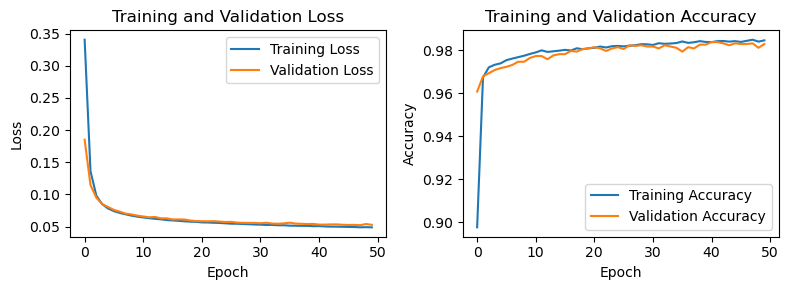

In [115]:
f, ax = plt.subplots(1, 2, figsize=(8, 3))

# Plotting the training and validation loss
a=ax[0]
a.plot(history.history['loss'], label='Training Loss')
a.plot(history.history['val_loss'], label='Validation Loss')
a.set_title('Training and Validation Loss')
a.set_xlabel('Epoch')
a.set_ylabel('Loss')
a.legend()

# Plotting the training and validation accuracy
a=ax[1]
a.plot(history.history['accuracy'], label='Training Accuracy')
a.plot(history.history['val_accuracy'], label='Validation Accuracy')
a.set_title('Training and Validation Accuracy')
a.set_xlabel('Epoch')
a.set_ylabel('Accuracy')
a.legend()

plt.tight_layout()
plt.show()

## Evaluate

In [116]:
# Make predictions
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Calculate scores
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted', zero_division=np.nan)
recall = sklearn.metrics.recall_score(y_test, y_pred, average='weighted')
f1 = sklearn.metrics.f1_score(y_test, y_pred, average='binary' if len(np.unique(y_test)) == 2 else 'weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


133/133 [==============================] - 0s 291us/step
Accuracy: 0.9827830188679245
Precision: 0.982664022652733
Recall: 0.9827830188679245
F1 Score: 0.9897023557624489


## Note: Different ways to define models

### 1) Sequential 
This is the most straightforward method, especially for models with a linear stack of layers.

In [ ]:
# Create a Sequential model
model = Sequential()
model.add(Dense(100, input_dim=len(input_metrics), activation='relu'))  # Hidden layer with 100 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer; use 'softmax' for multi-class


In [81]:
## Alternative syntax - pass in a list
# Create a Sequential model
model = Sequential([
    Dense(100, input_dim=len(input_metrics), activation='relu'),
    Dense(1, activation='sigmoid')
])

### 2) Functional API
The Functional API is more flexible and allows for models with non-linear topology, shared layers, and even multiple inputs or outputs.

In [92]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [93]:
# Define the input layer of the neural network.
# 'Input()' is used to instantiate a Keras tensor.
# 'shape=(len(input_metrics),)' defines the shape of the input data,
# which is the number of features in the dataset.
inputs = Input(shape=(len(input_metrics),))

# Add a dense (fully connected) layer with 100 neurons (units) and ReLU activation.
# This layer takes the 'inputs' tensor as its input and produces another tensor as output.
# Dense layers are commonly used in neural networks for processing data.
x = Dense(100, activation='relu')(inputs)

# Add another dense layer with 1 neuron and sigmoid activation.
# This is typically used for binary classification.
# It takes the output tensor of the previous layer as input and produces the final output tensor.
outputs = Dense(1, activation='sigmoid')(x)

# Create the Keras Model.
# This model specifies the input and output tensors to be used.
# When training and making predictions, data will flow from 'inputs' through the dense layers to 'outputs'.
model = Model(inputs=inputs, outputs=outputs)

### 3) Subclassing the 'Model' class
Subclassing allows for full customization and enables defining custom layers, custom training loops, and more.

In [111]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [117]:
class CustomModel(Model):
    def __init__(self, input_metrics_length):
        # Call the constructor of the Model class
        # This initializes the internals of the Model class that CustomModel is extending
        super(CustomModel, self).__init__()

        self.dense1 = Dense(100, activation='relu', input_dim=input_metrics_length)
        self.dense2 = Dense(1, activation='sigmoid')

    def call(self, inputs):
        # The call method is where the actual computation of the model happens.
        # Here, it processes 'inputs' through the first dense layer, then the second one.
        
        # Pass the inputs through the first dense layer
        x = self.dense1(inputs)
        
        # Pass the output of the first layer to the second layer
        # and return its output.
        return self.dense2(x)

# Instantiate the CustomModel with the required input dimension.
# 'len(input_metrics)' specifies the number of features in the input data.
model = CustomModel(len(input_metrics))

# Multi-class classifier

**Key Changes for Multi-class Classification**
1. **Label Encoding and One-Hot Encoding**: The target variable (`Cohort ID`) is first label encoded and then one-hot encoded for multi-class classification.
2. **Output Layer and Activation**: The output layer's size is set to the number of unique classes, and the activation function is 'softmax'.
3. **Loss Function**: The loss function is 'categorical_crossentropy', suitable for multi-class classification problems.
The number of epochs, batch size, and network architecture should be adjusted as needed for your specific dataset and classification task.

## Prepare data

In [97]:
# Define input metrics
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen', 'Frame 5', 'Median speed', 'Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics].values

# standardize the data
# this is not strictly needed, but is a good idea - it usually leads to better fitting models
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

## use this for drone/worker classification
# y = np.tile('Worker',len(X))
# y[df_classify['IsDrone']] = 'Drone'

## use this for cohort ID classification
y = df_classify['Cohort ID']

# Encode the labels
label_encoder = sklearn.preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels for multi-class classification

# convert integers to dummy variables (i.e. one hot encoded)
y_encoded = np_utils.to_categorical(y_encoded)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=5)

## Define model

In [98]:
# Create a Sequential model
model = Sequential()
model.add(Dense(100, input_dim=len(input_metrics), activation='relu'))  # Hidden layer with 100 neurons
model.add(Dense(y_encoded.shape[1], activation='softmax'))  # Output layer for multi-class

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train model

In [99]:
# Fit the model
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2, verbose=0)


View the loss function and accuracy

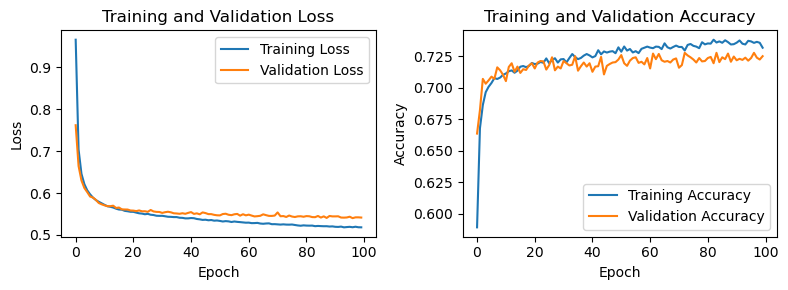

In [100]:
f, ax = plt.subplots(1, 2, figsize=(8, 3))

# Plotting the training and validation loss
a=ax[0]
a.plot(history.history['loss'], label='Training Loss')
a.plot(history.history['val_loss'], label='Validation Loss')
a.set_title('Training and Validation Loss')
a.set_xlabel('Epoch')
a.set_ylabel('Loss')
a.legend()

# Plotting the training and validation accuracy
a=ax[1]
a.plot(history.history['accuracy'], label='Training Accuracy')
a.plot(history.history['val_accuracy'], label='Validation Accuracy')
a.set_title('Training and Validation Accuracy')
a.set_xlabel('Epoch')
a.set_ylabel('Accuracy')
a.legend()

plt.tight_layout()
plt.show()

## Evaluate

In [101]:
# Make predictions
y_pred = model.predict(x_test)

# Convert predictions to label indexes
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)

# Calculate scores
accuracy = sklearn.metrics.accuracy_score(y_test_label, y_pred_label)
precision = sklearn.metrics.precision_score(y_test_label, y_pred_label, average='weighted', zero_division=np.nan)
recall = sklearn.metrics.recall_score(y_test_label, y_pred_label, average='weighted')
f1 = sklearn.metrics.f1_score(y_test_label, y_pred_label, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


133/133 [==============================] - 0s 305us/step
Accuracy: 0.7181603773584906
Precision: 0.7119358815119128
Recall: 0.7181603773584906
F1 Score: 0.7089035226396468


# Regression model

## Prepare data

In [69]:
dfsmall = df[::100]
dfsmall.shape

(2028, 38)

In [70]:
# lets pick some values from the dataframe to create the input matrix X and the output matrix y
X = dfsmall[['Honey','Brood care','Frame 5','Age']]
y = dfsmall[['Dispersion (avg)','Median speed']]
# filter for nans
sel = np.logical_not(np.any(X.isna(),axis=1) | np.any(y.isna(),axis=1) )
X = X[sel]
y = y[sel]

# use this to normalize the input/output values before fitting
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
y = (y-np.mean(y,axis=0))/np.std(y,axis=0)

# train and test split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1622, 4) (1622, 2)
Test set: (406, 4) (406, 2)


## Define model

In [76]:
# Build the Keras model
model = keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1]))  # Output layer for multi-output regression (num units matches num predictors

model.compile(optimizer='adam', loss='mean_squared_error')

## Train model

In [77]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=128, verbose=0)


View the loss function

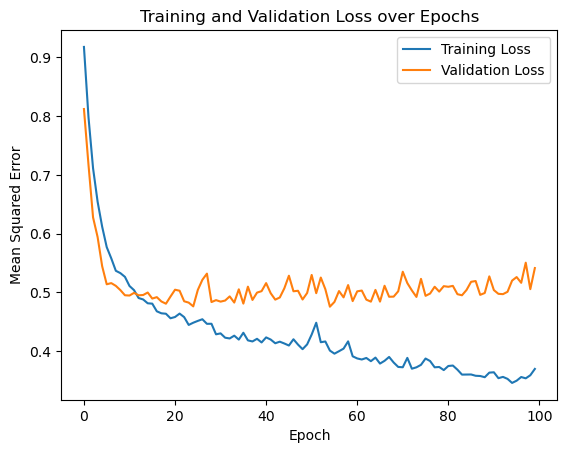

In [78]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


## Evaluate

In [79]:
# Evaluate the model on the test set
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss (Mean Squared Error): {test_loss}")


13/13 [==============================] - 0s 445us/step - loss: 0.5658
Test Loss (Mean Squared Error): 0.5658063292503357


In [80]:
y_pred = model.predict(x_test)
print('r^2 score:',sklearn.metrics.r2_score(y_test,y_pred))
print('MSE:',sklearn.metrics.mean_squared_error(y_test,y_pred))

13/13 [==============================] - 0s 488us/step
r^2 score: 0.4797417563873952
MSE: 0.5658063888221713


# PyTorch - Multi-class classifier

In [118]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

## Prepare data

In [126]:
# Define input metrics
input_metrics = ['Num. observations', 'Honey', 'Brood care', 'Pollen', 'Frame 5', 'Median speed', 'Dispersion (avg)', 'Exit distance (median)']
X = df_classify[input_metrics].values

# standardize the data
# this is not strictly needed, but is a good idea - it usually leads to better fitting models
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

## use this for drone/worker classification
# y = np.tile('Worker',len(X))
# y[df_classify['IsDrone']] = 'Drone'

## use this for cohort ID classification
y = df_classify['Cohort ID']

# Encode the labels
label_encoder = sklearn.preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the labels for multi-class classification

# convert integers to dummy variables (i.e. one hot encoded)
y_encoded = np_utils.to_categorical(y_encoded)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.float32)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=5)


## Define model

In [145]:
# Define the model using the Sequential API
model = nn.Sequential(
    nn.Linear(X.shape[1], 100),  # Input layer to first hidden layer
    nn.ReLU(),                   # Activation function for the first hidden layer
    nn.Linear(100, y_encoded.shape[1]),  # Second hidden layer to output layer
    nn.Softmax(dim=1)            # Activation function for the output layer
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Train model

In [146]:
num_epochs = 1000
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    model.train()
    # Forward pass and loss computation
    outputs = model(x_train)
    loss = criterion(outputs, torch.max(y_train, 1)[1])
    train_losses.append(loss.item())

    # Calculating training accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == torch.max(y_train, 1)[1]).sum().item()
    train_acc = correct / len(y_train)
    train_accuracies.append(train_acc)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss and accuracy
    model.eval()
    with torch.no_grad():
        val_outputs = model(x_test)
        val_loss = criterion(val_outputs, torch.max(y_test, 1)[1])
        val_losses.append(val_loss.item())

        # Calculating validation accuracy
        _, val_predicted = torch.max(val_outputs, 1)
        val_correct = (val_predicted == torch.max(y_test, 1)[1]).sum().item()
        val_acc = val_correct / len(y_test)
        val_accuracies.append(val_acc)

View the loss function and accuracy

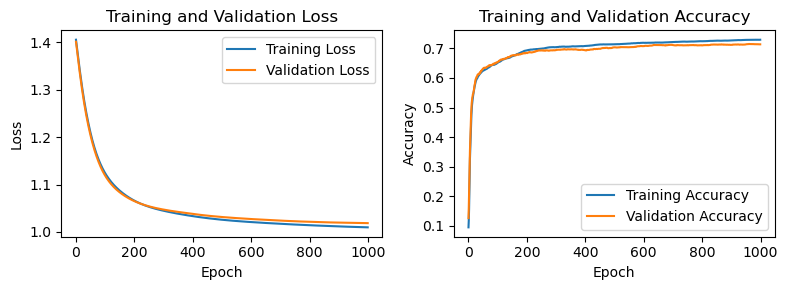

In [147]:
# Plotting the training and validation loss
f, ax = plt.subplots(1, 2, figsize=(8, 3))

a=ax[0]
a.plot(train_losses, label='Training Loss')
a.plot(val_losses, label='Validation Loss')
a.set_title('Training and Validation Loss')
a.set_xlabel('Epoch')
a.set_ylabel('Loss')
a.legend()

# Plotting the training and validation accuracy
a=ax[1]
a.plot(train_accuracies, label='Training Accuracy')
a.plot(val_accuracies, label='Validation Accuracy')
a.set_title('Training and Validation Accuracy')
a.set_xlabel('Epoch')
a.set_ylabel('Accuracy')
a.legend()

plt.tight_layout()
plt.show()

## Evaluate

In [149]:
# Evaluating the model
model.eval()
with torch.no_grad():
    outputs = model(x_test)
    _, predicted = torch.max(outputs.data, 1)
    _, labels = torch.max(y_test.data, 1) 
    # Calculate scores
y_test_labels = labels.numpy()
y_pred_label = predicted.numpy()
accuracy = sklearn.metrics.accuracy_score(y_test_label, y_pred_label)
precision = sklearn.metrics.precision_score(y_test_label, y_pred_label, average='weighted', zero_division=np.nan)
recall = sklearn.metrics.recall_score(y_test_label, y_pred_label, average='weighted')
f1 = sklearn.metrics.f1_score(y_test_label, y_pred_label, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7134433962264151
Precision: 0.7096260852608194
Recall: 0.7134433962264151
F1 Score: 0.7026711077623545
